In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from plotting import plot_utils, summary_plots, load_fits, plot_prf_params, pycortex_plot_utils
plot_utils.set_all_font_sizes(12)
from utils import roi_utils, default_paths, stats_utils, nsd_utils

In [13]:
# Load results of the fitting procedure
# subjects = np.arange(1,9)
subjects=[5,6,7,8]
n_subjects = len(subjects)

semantic_discrim_type = 'all_coco_categ_pca'
fitting_type = 'full_midlevel_plus_%s_plus_clip_RN50_best_layer_pca'\
        %(semantic_discrim_type)

out = [load_fits.load_fit_results(subject=ss, fitting_type=fitting_type, n_from_end=0, \
                                  verbose=True) \
       for ss in subjects]
fig_save_folder=None

# initialize roi_def objects to get roi indices
skip_inds = [4,5,7,11,12, 19,20, 22, 24]
roi_def = roi_utils.multi_subject_roi_def(subjects, skip_areas=skip_inds)
roi_names =roi_def.roi_names
n_rois = roi_def.n_rois


loading from /user_data/mmhender/imStat/model_fits/S05/full_midlevel_plus_all_coco_categ_pca_plus_clip_RN50_best_layer_pca/Mar-14-2022_2015_58/all_fit_params.npy

dict_keys(['subject', 'volume_space', 'fitting_types', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'which_prf_grid', 'models', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 'val_cc', 'val_r2', 'partial_masks', 'partial_version_names', 'zscore_features', 'ridge', 'debug', 'up_to_sess', 'single_sess', 'shuff_rnd_seed', 'use_precomputed_prfs', 'saved_prfs_fn', 'best_layer_each_voxel', 'saved_best_layer_fn', 'voxel_subset_is_done_trn', 'voxel_subset_is_done_val', 'semantic_feature_set', 'use_pca_st_feats', 'use_pca_pyr_feats_hl', 'pyramid_feature_info', 'group_all_hl_feats', 'do_pyr_varpart', 'n_ori_gabor', 'n_sf_gabor', 'gabor_nonlin_fn', 'use_pca_gabor_feats', 'clip_layer_name', 'clip_model_architecture', 'use_pca_clip_feats'])
loading from /user_data/mmhender/imStat/mod

In [14]:
np.logspace(np.log(0.01),np.log(10**10+0.01),20, dtype=np.float32, base=np.e) - 0.01
            

array([0.00000000e+00, 3.28133255e-02, 1.73298061e-01, 7.74760008e-01,
       3.34981823e+00, 1.43744984e+01, 6.15748215e+01, 2.63655090e+02,
       1.12882788e+03, 4.83292041e+03, 2.06913711e+04, 8.85866719e+04,
       3.79269031e+05, 1.62377675e+06, 6.95192800e+06, 2.97635140e+07,
       1.27427496e+08, 5.45559488e+08, 2.33572147e+09, 1.00000000e+10],
      dtype=float32)

In [15]:
out[0]['lambdas']

array([9.9999999e-09, 6.4989425e-02, 5.5234134e-01, 4.2069650e+00,
       3.1612778e+01, 2.3712740e+02, 1.7782695e+03, 1.3335206e+04,
       1.0000000e+05], dtype=float32)

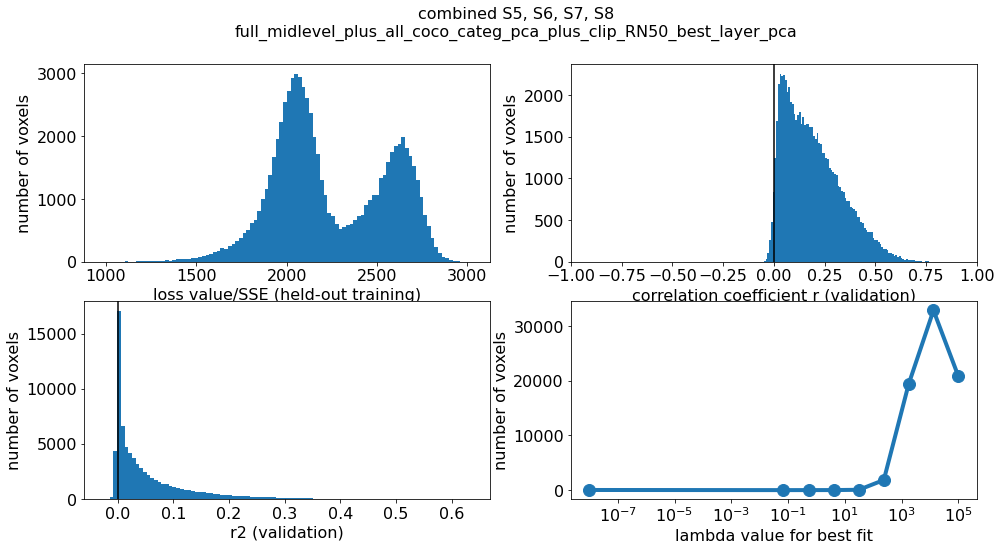

In [12]:
summary_plots.plot_perf_summary(fitting_type, out)

In [3]:
for ii in range(n_subjects):
    print(out[ii]['voxel_subset_is_done_trn'])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [4]:
for ii in range(n_subjects):
    print(out[ii]['voxel_subset_is_done_val'])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [5]:
# Load CLIP fit on its own
fitting_type = 'clip_RN50_best_layer_pca'

out_clip_solo = [load_fits.load_fit_results(subject=ss, fitting_type=fitting_type, n_from_end=0, verbose=False) \
       for ss in subjects]

leave_out_clip


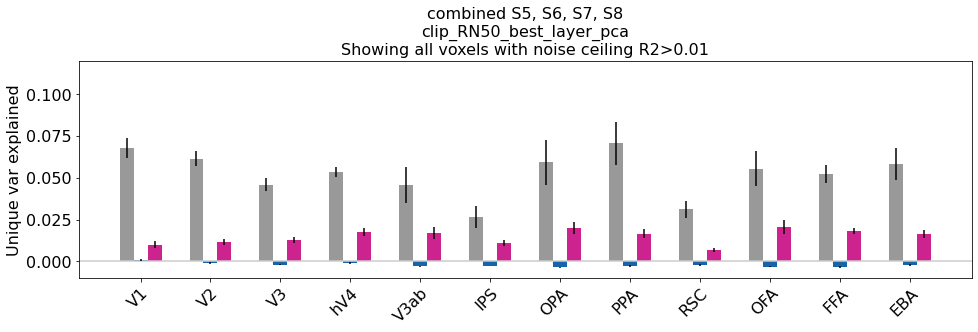

In [6]:
# Make a barplot for variance partition across all ROIs and subjects
roi_names =roi_def.roi_names
nc_thresh = 0.01


print(out[0]['partial_version_names'][6])

name1 = 'full midlevel + all-coco-categ'
name2 = 'clip'

ve_names = ['shared', 'unique: ' + name1, 'unique: ' + name2]

gray_color = np.array([[0.6, 0.6, 0.6, 1]])
clip_color = cm.RdPu(np.linspace(0,1,4))[2:3,:]
combined_color = cm.Blues(np.linspace(0,1,6))[4:5,:]

colors = np.concatenate([gray_color, combined_color, clip_color], axis=0)

vals = np.zeros((n_subjects, n_rois, 3))

for si, ss in enumerate(subjects):
    
    val_r2 = out[si]['val_r2']
    val_r2_clip_solo = out_clip_solo[si]['val_r2'][:,0]
    
    r2_combined = val_r2[:,0]
    r2_a = val_r2[:,6]    
    r2_b = val_r2_clip_solo
    
    nc = nsd_utils.ncsnr_to_nc(out[si]['voxel_ncsnr'][out[si]['voxel_mask']])/100
    inds2use = nc>nc_thresh
    
    shared_ab, unique_a, unique_b = stats_utils.get_shared_unique_var(r2_combined, \
                                                                  r2_a, \
                                                                  r2_b)
    var_expl = np.array([shared_ab, unique_a, unique_b]).T

    for ri in range(n_rois):
        
        inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri) & inds2use
        if np.sum(inds_this_roi)==0:
            print('subj %d %s has no voxels'%(ss, roi_names[ri]))
            vals[si,ri,:] = np.nan
        vals[si,ri,:] = np.mean(var_expl[inds_this_roi,:], axis=0)
        
mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title='%s\n%s\nShowing all voxels with noise ceiling R2>%.2f'%(summary_plots.get_substr(out), \
                                                                       fitting_type, nc_thresh)

plt.rcParams['pdf.fonttype']=42
plot_utils.set_all_font_sizes(fs = 16)
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=0.2, \
                xticklabels=roi_names, ylabel='Unique var explained', \
                ylim=[-0.01, 0.12], title=title, horizontal_line_pos=0,\
                legend_labels=ve_names, \
                legend_overlaid=False, legend_separate=False, \
                fig_size=(16,4))

fn2save = '/user_data/mmhender/imStat/figures/variance_partition_midlevel_semantic_clip.pdf'
plt.savefig(fn2save)

leave_out_clip


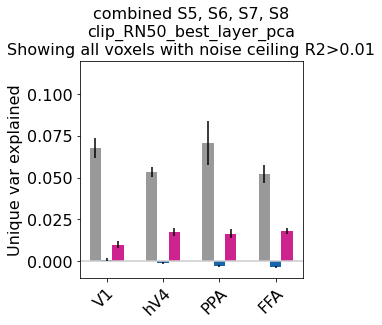

In [7]:
# Make a barplot for variance partition across all ROIs and subjects
roi_names =roi_def.roi_names
nc_thresh = 0.01

rois_plot = [0,3,7,10];

print(out[0]['partial_version_names'][6])

name1 = 'full midlevel + all-coco-categ'
name2 = 'clip'

ve_names = ['shared', 'unique: ' + name1, 'unique: ' + name2]

gray_color = np.array([[0.6, 0.6, 0.6, 1]])
clip_color = cm.RdPu(np.linspace(0,1,4))[2:3,:]
combined_color = cm.Blues(np.linspace(0,1,6))[4:5,:]

colors = np.concatenate([gray_color, combined_color, clip_color], axis=0)

vals = np.zeros((n_subjects, len(rois_plot), 3))

for si, ss in enumerate(subjects):
    
    val_r2 = out[si]['val_r2']
    val_r2_clip_solo = out_clip_solo[si]['val_r2'][:,0]
    
    r2_combined = val_r2[:,0]
    r2_a = val_r2[:,6]    
    r2_b = val_r2_clip_solo
    
    nc = nsd_utils.ncsnr_to_nc(out[si]['voxel_ncsnr'][out[si]['voxel_mask']])/100
    inds2use = nc>nc_thresh
    
    shared_ab, unique_a, unique_b = stats_utils.get_shared_unique_var(r2_combined, \
                                                                  r2_a, \
                                                                  r2_b)
    var_expl = np.array([shared_ab, unique_a, unique_b]).T

    for ri, rr in enumerate(rois_plot):
        
        inds_this_roi = roi_def.ss_roi_defs[si].get_indices(rr) & inds2use
        if np.sum(inds_this_roi)==0:
            print('subj %d %s has no voxels'%(ss, roi_names[rr]))
            vals[si,ri,:] = np.nan
        vals[si,ri,:] = np.mean(var_expl[inds_this_roi,:], axis=0)
        
mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title='%s\n%s\nShowing all voxels with noise ceiling R2>%.2f'%(summary_plots.get_substr(out), \
                                                                       fitting_type, nc_thresh)

plt.rcParams['pdf.fonttype']=42
plot_utils.set_all_font_sizes(fs = 16)
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=0.2, \
                xticklabels=np.array(roi_names)[rois_plot], ylabel='Unique var explained', \
                ylim=[-0.01, 0.12], title=title, horizontal_line_pos=0,\
                legend_labels=ve_names, \
                legend_overlaid=False, legend_separate=False, \
                fig_size=(4,4))

fn2save = '/user_data/mmhender/imStat/figures/variance_partition_midlevel_semantic_clip_small.pdf'
plt.savefig(fn2save)

In [21]:
out[0]['partial_version_names']

['full_combined_model',
 'leave_out_gabor_solo',
 'leave_out_pyramid_texture',
 'leave_out_sketch_tokens',
 'leave_out_semantic_coco_things_categ_pca',
 'leave_out_semantic_coco_stuff_categ_pca',
 'leave_out_clip']

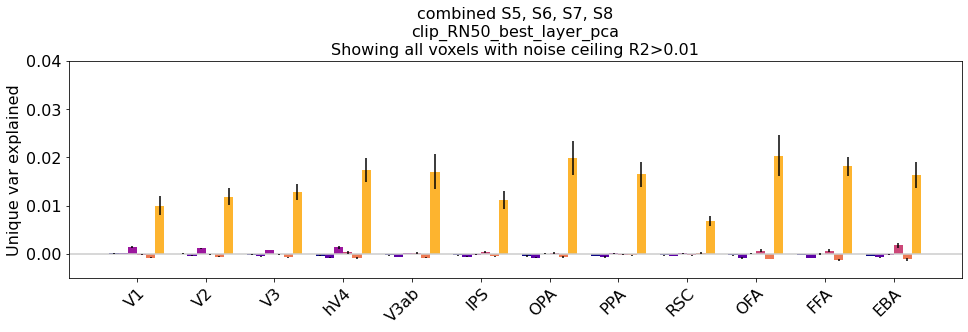

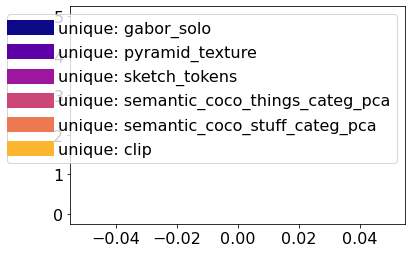

In [8]:
# Make a barplot for variance partition across all ROIs and subjects
roi_names =roi_def.roi_names
nc_thresh = 0.01

# each of these indices is one feature set left out at a time.
ppinds = [1,2,3,4,5,6]
ve_names = ['unique: %s'%out[0]['partial_version_names'][pp].split('leave_out_')[1]\
           for pp in ppinds]

colors = cm.plasma(np.linspace(0,1,7))[0:6,:]

vals = np.zeros((n_subjects, n_rois, 6))

for si, ss in enumerate(subjects):
    
    val_r2 = out[si]['val_r2']    
    nc = nsd_utils.ncsnr_to_nc(out[si]['voxel_ncsnr'][out[si]['voxel_mask']])/100
    inds2use = nc>nc_thresh

    var_expl = np.tile(val_r2[:,0:1], [1,6]) - val_r2[:,ppinds]

    for ri in range(n_rois):
        
        inds_this_roi = roi_def.ss_roi_defs[si].get_indices(ri) & inds2use
        if np.sum(inds_this_roi)==0:
            print('subj %d %s has no voxels'%(ss, roi_names[ri]))
            vals[si,ri,:] = np.nan
        vals[si,ri,:] = np.mean(var_expl[inds_this_roi,:], axis=0)
        
mean_vals = np.mean(vals, axis=0)
sem_vals = np.std(vals, axis=0) / np.sqrt(n_subjects)

legend_separate=True
title='%s\n%s\nShowing all voxels with noise ceiling R2>%.2f'%(summary_plots.get_substr(out), \
                                                                       fitting_type, nc_thresh)

plot_utils.set_all_font_sizes(fs = 16)
fh = plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=sem_vals, colors=colors, space=0.1, \
                xticklabels=roi_names, ylabel='Unique var explained', \
                ylim=[-0.005, 0.040], title=title, horizontal_line_pos=0,\
                legend_labels=ve_names, \
                legend_overlaid=False, legend_separate=legend_separate, \
                fig_size=(16,4))
